# Задача 4.1

Рассмотрим данные из табллицы 1 по числу заболевших и выздоровевших от короновируса в разных странах. Требуется проверить гипотезу о том, что число выздоровевших людей в странах не зависит от числа заболевших в стране.

Требуется:

- записать задачу формально;
- предложить статистику для решения данной задачи;
- записать приближенно нулевое распределение данной статистики;
- записать явно правило принятия решения на основе статистики и нулевого распределения для обеспечения уровня значимости alpha = 0.05;
- проверить гипотезу по записанному критерию, для данных из условия. Противоречат ли они гипотезу?
- на уровне значимости alpha = 0.05 найти зависимость мощности критерия в зависимости от истинного значения статистики.

# Решение

Логично предположить наличие монотонной зависимости в данных (чем больше заболевших, чем больше выздоровевших). Таким образом, будем проверять наличие статистически значимой корреляции кендалла.

## 1) Записать задачу формально, предложить статистику

$$\tau_{X_1, X_2} = \frac{C-D}{C+D}, \text{C и D число согласованных и несогласованных пар соответственно}$$

$$\text{выборка:   } X_1^N = (X_11\dots X_1N), X_2^N = (X_21\dots X_2N)$$

$$\text{выборки связанные}$$

$$\text{нулевая гипотеза:   } H_0:\tau_{X_1, X_2} = 0$$

$$\text{альтернатива:   } H_1:\tau_{X_1, X_2}<\ne>0$$

$$\text{статистика:   } T(X_1^N, X_2^N) = \tau_{X_1, X_2}$$

## 2) Приближенное нулевое рапределение

Коэфициент можно переписать как

$$\tau = \frac{4C}{N(N-1)}-1$$

Можно показать (очень тяжело и нетривиально), что при $H_0, N > 10$ верна аппроксимация нормальным рапределением.

$$\text{нулевое распределение:   } \sim \mathscr N\Bigl(0, \frac{2(2N+5)}{9N(N-1)}\Bigr)$$

## 3) Правило принятия решения
Отвергнуть нулевую гипотезу, если
$$p(T) = 2(1-F_{\mathscr N\bigl(0,\frac{2(2N+5)}{9N(N-1)}\bigr)}(|T|))<0.05$$

## 4) Проверить гипотезу на предложенных данных

In [1]:
import pandas as pd
import scipy.stats as st
import numpy as np
from statsmodels.stats.descriptivestats import sign_test

In [2]:
data = pd.read_csv("data/corona.csv")
data.head()

,Страна,заболевшие,выздоровевшие
0,германия,2078,25
1,дания,617,1
2,малайзия,149,26
3,австрия,302,4
4,ирак,71,15


In [3]:
data = data.values
data.shape

(26, 3)

Применима аппроксимация нормальным распределением

In [4]:
ill = []
recovered = []
for country in data:
    ill.append(country[1])
    recovered.append(country[2])
ill = np.array(ill)
recovered = np.array(recovered)

In [5]:
def kendall_test(data1, data2):
    N = len(data1)
    C = sum([(data1[i] < data1[j]) == (data2[i] < data2[j]) for i in range(N-1) for j in range(i+1, N)])
    D = 2*(2*N+5)/(9*N*(N-1))
    T = 4*C/(N*(N-1)) - 1
    return T, 2*(1 - st.norm(0, np.sqrt(D)).cdf(np.abs(T)))

In [6]:
kendall_test(ill, recovered)

(0.27384615384615385, 0.04979765287012272)

In [7]:
st.kendalltau(ill, recovered, method="asymptotic")

KendalltauResult(correlation=0.28351110894619114, pvalue=0.044325607642096566)

Функция из пакета использует $\tau_b$, корелляцию, у которой немного другое определение, в то время как я посчитал более древнюю $\tau_a$ корелляцию.

Так или иначе, гопотеза об отсутствии корреляции отвергается в пользу альтернативы. В данных присутствует монотонная зависимость.

## 5) Зависимость мощности от истинного значения статистики

Мощность критерия это $1-\beta$, где $\beta$ - вероятность допустить ошибку первого рода. Зафиксируем размер выборки N = 25 и исследуем зависимость мощности критерия от истинного значения $\tau$.

In [8]:
tau = np.linspace(0.001, 1., 1000)
N = 25

Пусть $E[\tau] = \tau_0$, тогда $E[C] = \frac{N(N-1)(\tau_0+1)}{4},~~C \in \bigl[0; \frac{N(N-1)}{2}\bigr]$

Будем считать, что пары в выборке подчиняются бернуллиевскому распрелению с параметром $p$, тогда $C \sim Bin \bigl(\frac{N(N-1)}{2}, p\bigr)$.
Отсюда $E[C] = \frac{pN(N-1)}{2} = \frac{N(N-1)(\tau_0+1)}{4}$

$$p = \frac{\tau_0+1}{2}$$

Тогда $$C = \frac{N(N-1)(\tau + 1)}{4} \sim Bin\Bigl(\frac{N(N-1)}{2}, \frac{\tau_0+1}{2}\Bigr)$$

Теперь используем интегральну теорему Муавра-Лапласа

$$\lim_{n \to \infty} P\Bigl(c \le \frac{X - np}{\sqrt{npq}} \le d\Bigr) = \frac{1}{\sqrt{2\pi}}\int_c^d e^{-\frac{x^2}{2}}dx$$

$$P\Bigl(c \le \frac{\frac{N(N-1)(\tau+1)}{4} -\frac{N(N-1)(\tau_0+1)}{4}}{\sqrt{\frac{N(N-1)}{2}\frac{\tau_0+1}{2}\bigl(1 - \frac{\tau_0+1}{2}\bigr)}} \le d\Bigr) = P\Bigl(c \le (\tau - \tau_0)\sqrt{\frac{N(N-1)}{2(1-\tau_0^2)}} \le d\Bigr)$$
Условие применимости
$$ npq > 10 $$

$$\frac{N(N-1)(1-\tau_0^2)}{8} > 10 \to \tau_0 < \sqrt{1-\frac{80}{N(N-1)}}$$

In [9]:
np.sqrt(1-80./(N*(N-1)))

0.9309493362512627

In [10]:
(2*N + 5)/9

6.111111111111111

Дисперся полученного нормального распределения сильно отличается от общепринятого результата, следовательно принципиально не существует таких распределений, что их парная выбока удовлетворяет сделанному предположению.

Таким образом, теоретически подсчитать ничего не удается. Будем поступать так: генерим 2 выборки размера N по такому принципу:

$X_1 \sim \mathcal{N}(0,1)$, $X_2 = X_1 + \alpha\varepsilon, \quad \varepsilon \sim\mathcal{N}(0,1)$

Затем, предполагая, что $\lim_{N\to \infty} \beta \to 0$ сгенерим выборку размера $\mathcal N = 1000$ и проверим гипотезу об отсутствии корелляции, после чего будем счиать, что знаем, верна или не верна гипотеза на самом деле. В дальнейшем работаем только с выборками, для которых удалось показать наличие корелляции.

После этого 1000 раз генерируем из того же распределения выборку размера $N = 25$ и для каждой проверяем гипотезу. Доля тех выборок, для которых гипотеза не была отвергнута, это и есть $\beta$.

Таким образом, варьируя $\alpha$ и считая коэффициент корелляции, получим экспериментальную зависимость $\beta(\tau)$

### Внимание!!! ячейка работает долго

In [16]:
alphas = np.linspace(0.1, 10.0, 100)
NN = 1000
N = 25
M = 1000
results = dict()
for alpha in alphas:
    X1 = np.random.randn(NN)
    X2 = X1 + alpha*np.random.randn(NN)
    tau, pval = kendall_test(X1, X2)
    if not pval < 0.05:
        continue
    counter = 0
    for _ in range(M):
        X1 = np.random.randn(N)
        X2 = X1 + alpha*np.random.randn(N)
        p_val = kendall_test(X1, X2)[1]
        counter += not p_val < 0.05
    results[tau] = counter/M

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
taus = []
powers = []
for tau, power in sorted(list(results.items())):
    taus.append(tau)
    powers.append(1. - power)
taus = np.array(taus)
powers = np.array(powers)

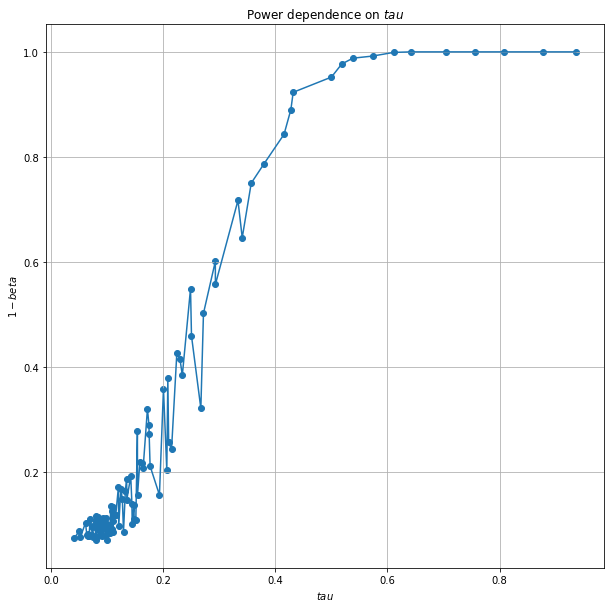

In [19]:
plt.figure(figsize=(10,10))
plt.plot(taus, powers)
plt.scatter(taus, powers)
plt.grid()
plt.title("Power dependence on $tau$")
plt.xlabel("$tau$")
plt.ylabel("$1-beta$")
plt.show()

# Вывод
Таким образом, в этой работе сначала было показано наличие статистически значимой корелляции кендалла между числом заболевших и умерших от коронавируса (положительная корелляция свидетельствует о наличии прямой монотонной зависимости - чем больше заболевших, тем больше выздоровевших).

Затем была исследована зависимость мощности критерия от самой корелляции. Зависимость в целом монотонная, что логично - более сильную корелляцию легче "поймать". Флуктуации при малых $\tau$ можно пытаться бороть, увеличивая $M$ и $NN$. Для исследования такой зависимости в принципе имеет значение вид исходного распределения. Мы использовали $X_1$ и $X_2$, описанные выше, но для других рапределений зависимость может иметь немного другой вид, хотя скорее всего все равно монотонный и похожий.